## Pandas 基础示例

本笔记将带您了解一些非常基础的 Pandas 概念。我们将从导入常见的数据科学库开始：


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 系列

系列（Series）类似于列表或一维数组，但带有索引。所有操作都基于索引对齐。


In [37]:
a = pd.Series(range(1,10))
b = pd.Series(["I","like","to","use","Python","and","Pandas","very","much"],index=range(0,9))
print(a,b)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64 0         I
1      like
2        to
3       use
4    Python
5       and
6    Pandas
7      very
8      much
dtype: object


系列的一个常见用途是**时间序列**。在时间序列中，索引具有特殊的结构——通常是一系列日期或日期时间。我们可以使用 `pd.date_range` 创建这样的索引。

假设我们有一个系列，显示每天购买的产品数量，并且我们知道每个星期天我们还需要为自己拿一个物品。以下是使用系列来建模的方法：


Length of index is 366


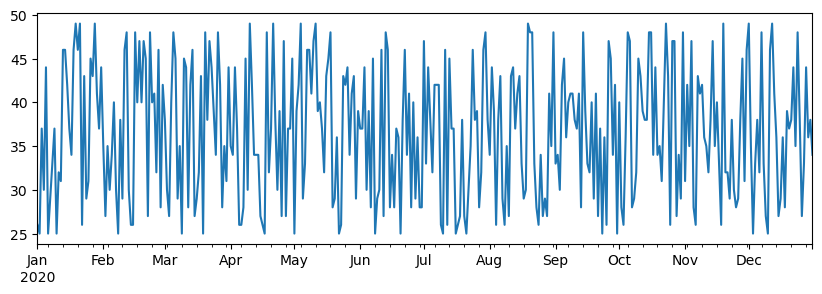

In [38]:
start_date = "Jan 1, 2020"
end_date = "Dec 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot(figsize=(10,3))
plt.show()

In [39]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
print(f"Additional items (10 item each week):\n{additional_items}")
total_items = items_sold+additional_items
print(f"Total items (sum of two series):\n{total_items}")

Additional items (10 item each week):
2020-01-05    10
2020-01-12    10
2020-01-19    10
2020-01-26    10
2020-02-02    10
2020-02-09    10
2020-02-16    10
2020-02-23    10
2020-03-01    10
2020-03-08    10
2020-03-15    10
2020-03-22    10
2020-03-29    10
2020-04-05    10
2020-04-12    10
2020-04-19    10
2020-04-26    10
2020-05-03    10
2020-05-10    10
2020-05-17    10
2020-05-24    10
2020-05-31    10
2020-06-07    10
2020-06-14    10
2020-06-21    10
2020-06-28    10
2020-07-05    10
2020-07-12    10
2020-07-19    10
2020-07-26    10
2020-08-02    10
2020-08-09    10
2020-08-16    10
2020-08-23    10
2020-08-30    10
2020-09-06    10
2020-09-13    10
2020-09-20    10
2020-09-27    10
2020-10-04    10
2020-10-11    10
2020-10-18    10
2020-10-25    10
2020-11-01    10
2020-11-08    10
2020-11-15    10
2020-11-22    10
2020-11-29    10
2020-12-06    10
2020-12-13    10
2020-12-20    10
2020-12-27    10
Freq: W-SUN, dtype: int64
Total items (sum of two series):
2020-01-01     NaN


正如您所看到的，我们在这里遇到了问题，因为在每周的序列中，未提及的日期被视为缺失值（`NaN`），而将 `NaN` 加到一个数字上会得到 `NaN`。为了获得正确的结果，我们在相加序列时需要指定 `fill_value`：


2020-01-01    26.0
2020-01-02    25.0
2020-01-03    37.0
2020-01-04    30.0
2020-01-05    54.0
              ... 
2020-12-27    43.0
2020-12-28    44.0
2020-12-29    36.0
2020-12-30    38.0
2020-12-31    34.0
Length: 366, dtype: float64


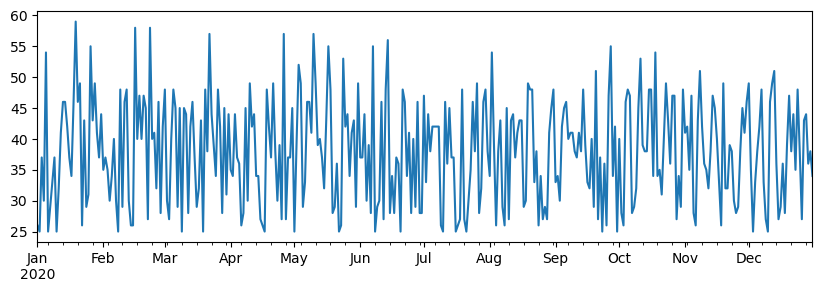

In [40]:
total_items = items_sold.add(additional_items,fill_value=0)
print(total_items)
total_items.plot(figsize=(10,3))
plt.show()

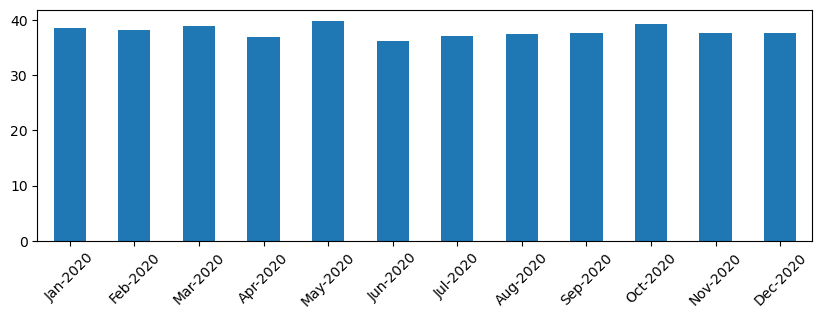

In [41]:
monthly = total_items.resample("1M").mean()
ax = monthly.plot(kind='bar',figsize=(10,3))
ax.set_xticklabels([x.strftime("%b-%Y") for x in monthly.index], rotation=45)
plt.show()

## 数据框

数据框本质上是具有相同索引的一组序列。我们可以将多个序列组合成一个数据框。假设上面定义了 `a` 和 `b` 序列：


In [42]:
df = pd.DataFrame([a,b])
df

0     1   2    3       4    5       6     7     8
0  1     2   3    4       5    6       7     8     9
1  I  like  to  use  Python  and  Pandas  very  much

我们也可以使用Series作为列，并使用字典指定列名：


In [43]:
df = pd.DataFrame({ 'A' : a, 'B' : b })
df

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

通过转置（然后重命名列以匹配前面的示例）可以实现相同的结果：


In [44]:
pd.DataFrame([a,b]).T.rename(columns={ 0 : 'A', 1 : 'B' })

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

从DataFrame中**选择列**可以这样完成：


In [45]:
print(f"Column A (series):\n{df['A']}")
print(f"Columns B and A (DataFrame):\n{df[['B','A']]}")

Column A (series):
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: A, dtype: int64
Columns B and A (DataFrame):
        B  A
0       I  1
1    like  2
2      to  3
3     use  4
4  Python  5
5     and  6
6  Pandas  7
7    very  8
8    much  9


根据过滤表达式**选择行**：


In [46]:
df[df['A']<5]

A     B
0  1     I
1  2  like
2  3    to
3  4   use

它的工作原理是，表达式 `df['A']<5` 返回一个布尔序列，该序列指示序列中每个元素的表达式是 `True` 还是 `False`。当序列用作索引时，它会返回 DataFrame 中的行子集。因此，不可能使用任意的 Python 布尔表达式，例如，编写 `df[df['A']>5 and df['A']<7]` 是错误的。相反，你应该在布尔序列上使用特殊的 `&` 操作：


In [47]:
df[(df['A']>5) & (df['A']<7)]

A    B
5  6  and

创建新的可计算列。我们可以通过使用直观的表达式轻松地为我们的DataFrame创建新的可计算列。以下代码计算A相对于其平均值的偏差。


In [48]:
df['DivA'] = df['A']-df['A'].mean()
df

A       B  DivA
0  1       I  -4.0
1  2    like  -3.0
2  3      to  -2.0
3  4     use  -1.0
4  5  Python   0.0
5  6     and   1.0
6  7  Pandas   2.0
7  8    very   3.0
8  9    much   4.0

实际发生的是我们在计算一个序列，然后将这个序列赋值给左侧，从而创建另一个列。


In [49]:
# WRONG: df['ADescr'] = "Low" if df['A'] < 5 else "Hi"
df['LenB'] = len(df['B']) # Wrong result

In [50]:
df['LenB'] = df['B'].apply(lambda x: len(x))
# or
df['LenB'] = df['B'].apply(len)
df

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6
5  6     and   1.0     3
6  7  Pandas   2.0     6
7  8    very   3.0     4
8  9    much   4.0     4

根据数字选择行可以使用`iloc`结构。例如，要从DataFrame中选择前5行：


In [52]:
df.iloc[:5]

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

**分组**通常用于获得类似于 Excel 中*数据透视表*的结果。假设我们想计算每个给定的 `LenB` 值对应的列 `A` 的平均值。那么我们可以按 `LenB` 对我们的 DataFrame 进行分组，然后调用 `mean`：


In [53]:
df.groupby(by='LenB').mean()

A      DivA
LenB                    
1     1.000000 -4.000000
2     3.000000 -2.000000
3     5.000000  0.000000
4     6.333333  1.333333
6     6.000000  1.000000

如果我们需要计算组内的平均值和元素数量，那么我们可以使用更复杂的 `aggregate` 函数：


In [58]:
df.groupby(by='LenB') \
 .aggregate({ 'DivA' : len, 'A' : lambda x: x.mean() }) \
 .rename(columns={ 'DivA' : 'Count', 'A' : 'Mean'})

Count      Mean
LenB                 
1         1  1.000000
2         1  3.000000
3         2  5.000000
4         3  6.333333
6         2  6.000000

## 打印和绘图

数据科学家经常需要探索数据，因此能够可视化数据非常重要。当 DataFrame 很大时，我们通常只需要通过打印前几行来确保操作正确。这可以通过调用 `df.head()` 来实现。如果你在 Jupyter Notebook 中运行，它会以漂亮的表格形式打印出 DataFrame。


In [59]:
df.head()

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

我们还了解了如何使用 `plot` 函数来可视化一些列的数据。虽然 `plot` 在许多任务中非常有用，并且通过 `kind=` 参数支持多种不同的图表类型，但你始终可以使用原生的 `matplotlib` 库来绘制更复杂的图表。我们将在单独的课程中详细讲解数据可视化。


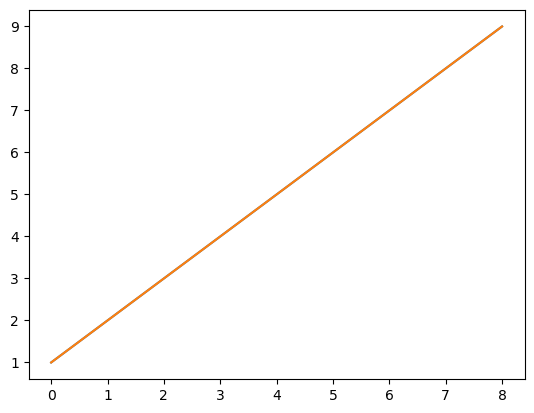

In [61]:
df['A'].plot()
plt.show()

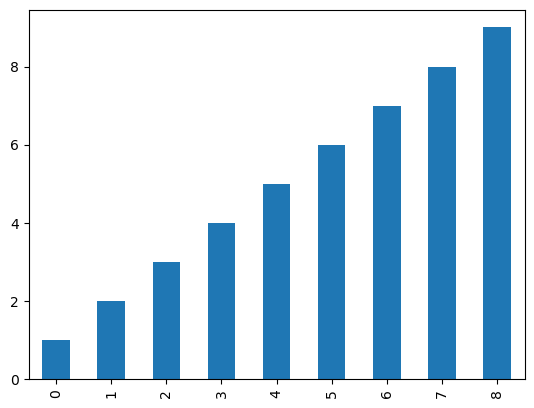

In [63]:
df['A'].plot(kind='bar')
plt.show()

本概述涵盖了 Pandas 的大部分重要概念，但这个库功能非常强大，你可以用它实现无限可能！现在，让我们运用这些知识来解决具体问题吧。



---

**免责声明**：  
本文档使用AI翻译服务[Co-op Translator](https://github.com/Azure/co-op-translator)进行翻译。尽管我们努力确保准确性，但请注意，自动翻译可能包含错误或不准确之处。应以原始语言的文档作为权威来源。对于关键信息，建议使用专业人工翻译。对于因使用本翻译而引起的任何误解或误读，我们概不负责。
